<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [1]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [2]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
pkgs/main/linux-64 ━━━━━━━━━━━━╸━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [18]:
tesla_ticker = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [10]:
tesla_data = tesla_ticker.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [40]:




if 'level_0' in tesla_data.columns:
    tesla_data.drop(columns=['level_0'], inplace=True)
if 'index' in tesla_data.columns:
    tesla_data.drop(columns=['index'], inplace=True)

# Ensure the Date column is named correctly
tesla_data.rename(columns={'Date': 'Date'}, inplace=True)

# Display the first five rows
print(tesla_data.head())




        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [12]:
# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Save the text of the response
html_data = response.text


Parse the html data using `beautiful_soup`.


In [13]:
soup = BeautifulSoup(html_data, "html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [14]:
# Extract the table with Tesla Revenue
tables = pd.read_html(str(soup))
tesla_revenue = tables[0]

# Rename columns
tesla_revenue.columns = ['Date', 'Revenue']

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [15]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [42]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.rename(columns={'Date': 'Date'}, inplace=True)

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [43]:
print(tesla_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [78]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Create a Ticker object for GameStop
gme_ticker = yf.Ticker("GME")

# Extract historical stock data for the maximum period
gme_data = gme_ticker.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Drop any additional levels of index if present
if 'level_0' in gme_data.columns:
    gme_data.drop(columns=['level_0'], inplace=True)
if 'index' in gme_data.columns:
    gme_data.drop(columns=['index'], inplace=True)

# Convert Date column to datetime
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# Display the first five rows
print(gme_data.head())




        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662209  1.603295  1.662209   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [79]:
# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

# Save the text of the response
html_data = response.text

# Parse the HTML data
soup = BeautifulSoup(html_data, "html.parser")

# Extract the table with GameStop Revenue
tables = pd.read_html(str(soup))
gme_revenue = tables[0]

# Rename columns
gme_revenue.columns = ['Date', 'Revenue']

# Remove comma and dollar sign from the Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)

# Convert Revenue to numeric type
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')

# Remove null or empty strings in the Revenue column
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Clean up and format the Date column correctly
def clean_date(date):
    # Extract the year part, assuming the format is like "2012"
    return pd.to_datetime(date, format='%Y')

gme_revenue['Date'] = gme_revenue['Date'].apply(clean_date)

# Display the cleaned data
print(gme_revenue.tail())


         Date  Revenue
11 2009-01-01     8806
12 2008-01-01     7094
13 2007-01-01     5319
14 2006-01-01     3092
15 2005-01-01     1843


In [74]:
gme_ticker = yf.Ticker("GME")

In [57]:
# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

# Save the text of the response
html_data = response.text

# Parse the HTML data
soup = BeautifulSoup(html_data, "html.parser")

# Extract the table with GameStop Revenue
tables = pd.read_html(str(soup))
gme_revenue = tables[0]

# Rename columns
gme_revenue.columns = ['Date', 'Revenue']

# Remove comma and dollar sign from the Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)

# Convert Revenue to numeric type
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')

# Remove null or empty strings in the Revenue column
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Convert Date column to datetime
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Display the last five rows
print(gme_revenue.tail())



                            Date  Revenue
11 1970-01-01 00:00:00.000002009     8806
12 1970-01-01 00:00:00.000002008     7094
13 1970-01-01 00:00:00.000002007     5319
14 1970-01-01 00:00:00.000002006     3092
15 1970-01-01 00:00:00.000002005     1843


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [20]:
gme_data = gme_ticker.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [44]:
gme_data.reset_index(inplace=True)
if 'level_0' in gme_data.columns:
    gme_data.drop(columns=['level_0'], inplace=True)
if 'index' in gme_data.columns:
    gme_data.drop(columns=['index'], inplace=True)
print(gme_data.head())

        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716073  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


Parse the html data using `beautiful_soup`.


In [23]:
soup = BeautifulSoup(html_data, "html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [45]:
# Extract the table with GameStop Revenue
tables = pd.read_html(str(soup))
gme_revenue = tables[0]

# Rename columns
gme_revenue.columns = ['Date', 'Revenue']

# Remove comma and dollar sign from the Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)

# Convert Revenue to numeric type
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')

# Remove null or empty strings in the Revenue column
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Clean up and format the Date column correctly
def clean_date(date):
    # Extract the year part, assuming the format is like "2012"
    return pd.to_datetime(date, format='%Y')

gme_revenue['Date'] = gme_revenue['Date'].apply(clean_date)

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [46]:
print(gme_revenue.tail())

    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [69]:
import yfinance as yf
import pandas as pd

# Create a Ticker object for Tesla
tesla_ticker = yf.Ticker("TSLA")

# Extract historical stock data for the maximum period
tesla_data = tesla_ticker.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Drop any additional levels of index if present
if 'level_0' in tesla_data.columns:
    tesla_data.drop(columns=['level_0'], inplace=True)
if 'index' in tesla_data.columns:
    tesla_data.drop(columns=['index'], inplace=True)

# Convert Date column to datetime
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Display the first five rows
print(tesla_data.head())



        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [72]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Save the text of the response
html_data = response.text

# Parse the HTML data
soup = BeautifulSoup(html_data, "html.parser")

# Extract the table with Tesla Revenue
tables = pd.read_html(str(soup))
tesla_revenue = tables[0]

# Rename columns
tesla_revenue.columns = ['Date', 'Revenue']

# Remove comma and dollar sign from the Revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",|\$", "", regex=True)

# Convert Revenue to numeric type
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')

# Remove null or empty strings in the Revenue column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Clean up and format the Date column correctly
# Assuming the dates might be in a different format, check and convert them appropriately
def clean_date(date):
    # Extract the year part, assuming the format is like "2012"
    return pd.to_datetime(date, format='%Y')

tesla_revenue['Date'] = tesla_revenue['Date'].apply(clean_date)

# Display the cleaned data
print(tesla_revenue.tail())


         Date  Revenue
8  2013-01-01     2013
9  2012-01-01      413
10 2011-01-01      204
11 2010-01-01      117
12 2009-01-01      112


## Question 3: Use yfinance to Extract Stock Data


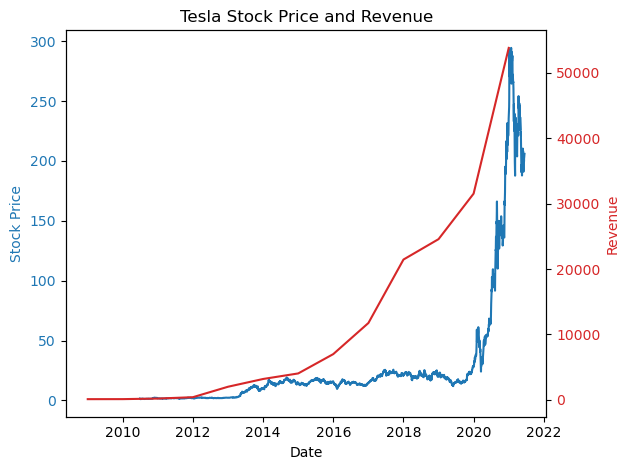

In [73]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots()
    
    # Filter data to ensure matching date ranges
    stock_data_specific = stock_data[(stock_data['Date'] >= revenue_data['Date'].min()) & (stock_data['Date'] <= '2021-06-14')]
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']
    
    # Plot stock data
    ax1.plot(stock_data_specific['Date'], stock_data_specific['Close'], color='tab:blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    # Create a second y-axis for the revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data_specific['Date'], revenue_data_specific['Revenue'], color='tab:red', label='Revenue')
    ax2.set_ylabel('Revenue', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    
    # Add title and show the plot
    plt.title(f'{stock_name} Stock Price and Revenue')
    fig.tight_layout()
    plt.show()

# Call the function to plot Tesla data
make_graph(tesla_data, tesla_revenue, 'Tesla')


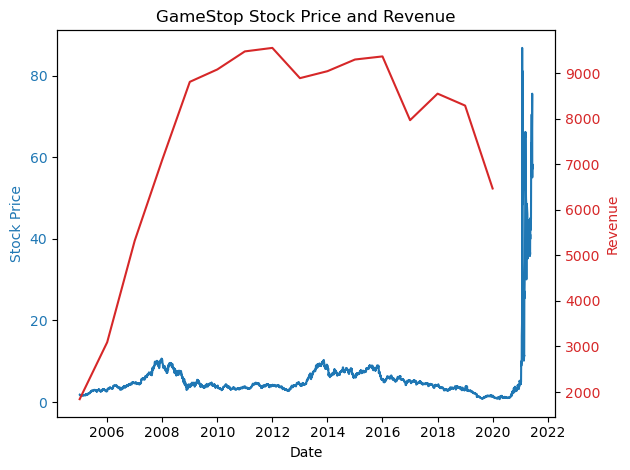

In [80]:
make_graph(gme_data, gme_revenue, 'GameStop')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani
